# Problem Statement


Instead of using a sample circuit, you will perform the tasks outlined for Beginner above for an actual LiH circuit. A given ansatz LiH circuit in the form of a QASM file `LiHJordanWignerMapper.qasm` will be supplied to you for your analysis [here](https://github.com/spendierk/Womanium_Hackathon_TKET_2022/blob/main/LiHJordanWignerMapper.qasm). The circuit was obtained by using the simplest qubit mapper/converter called the Jordan-Wigner Mapper. This circuit is quite deep. Before optimization, the circuit will have a total of 12 qubits and more than 16,000 gates.

---

# Solution

Team QBubble: Zhixin Song, Tingting Li, and Yuxuan Yan\
Last update: 08/23/2022

Required Packages:\
qiskit==0.37.1\
pytket==1.5.0 


## 0. Test case 

For the circuit level compiling, we use `LiHJordanWignerMapper.qasm` as a test case. This **12-qubit** circuit contains **8064 CNOT gates** and **640 parametrized Rz gates**.


In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit.from_qasm_file("LiHJordanWignerMapper.qasm")
print("Depth: %i" % qc.depth())
print("CNOTS: %i" % qc.count_ops()['cx'])
print("Rz: %i" % qc.count_ops()['rz'])
print("Circuit too large to draw!!")
# qc.draw("mpl")

Depth: 9834
CNOTS: 8064
Rz: 640
Circuit too large to draw!!


## 1. Backends

Hardware backends available to our team include: IBMQ, IonQ, Quantinuum (fail to push the job to H1-1 and H1-2 for some reason).


## 2. Benchmarks

The goal of compiling is to reduce the effective circuit depth $D$ and number of CNOT gates $N_{\text{CNOT}}$. In this case, we will check the performance of pytket compiler under these 2 metrics.

## 3. Compiler Results


Before compiling

| Test files  | Width       | Depth $D$  |  $N_{\text{CNOT}}$   | $N_{\theta}$ |
| ----------- | :-----------: |:-----------: | :-----------: | :-----------: |
| LiH-JW       | 12-qubit     | 9834         | 8064         | 640       |


After compiling

| Backends    | Compiler    |Test file   | Qubits      |Optimization level      | $D$     | $N_{\text{CNOT}}$   |$N_{\theta}$   | Fidelity $F$ |
| ----------- | :----------: |:-----------:| :-----------: |:-----------: |:-----------: | :-----------: | :-----------: | :-----------: |
| ionq_simulator  |  TKET       | LiH-JW      | 29          | 2          | 7004      |  4336      | 4972      | 100% (noiseless simulator)      |
|quantinuum.hqs-lt-s1-sim  | TKET  | LiH-JW   | 12          | 2          | 7004      | 4336       | 4952       | ? (emulator failed)     |



### 3.0 Simulator Result

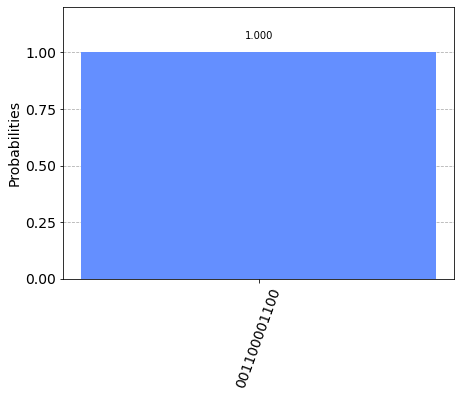

In [2]:
from qiskit import IBMQ, QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

# Load circuit from QASM file
qc = QuantumCircuit.from_qasm_file("LiHJordanWignerMapper.qasm")
qc.measure_all()

backend_sim = Aer.get_backend("qasm_simulator")
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts()
plot_histogram(counts)

### 3.1 Access IonQ Backends through TKET

**Please run the following code on Microsoft Azure!!!!**

In [ ]:
from pytket.extensions.qsharp import AzureBackend
from pytket import Circuit, OpType
from pytket.qasm import circuit_to_qasm, circuit_from_qasm
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit

backend_ionQ = AzureBackend("ionq.simulator",resourceId="token",location="eastus")

# Load circuit from QASM file
qasmfile = 'LiHJordanWignerMapper.qasm'
qc = circuit_from_qasm(qasmfile)
qc.measure_all()
backend_ionQ.valid_circuit(qc)

for ol in range(3):
    compiled_circ = qc.copy()
    backend_ionQ.default_compilation_pass(ol).apply(compiled_circ)
    assert backend_ionQ.valid_circuit(compiled_circ)
    print("Optimisation level", ol)
    print("CXs", compiled_circ.n_gates_of_type(OpType.CX))
    print("Rzs", compiled_circ.n_gates_of_type(OpType.Rz))

circ = tk_to_qiskit(compiled_circ)
print('\nDepth:', circ.depth())
print('Gate counts:', circ.count_ops())

### 3.2 Access Quantinuum Backends through TKET

**Please run the following code on Microsoft Azure!!!!**

In [ ]:
from pytket.extensions.qsharp import AzureBackend
from pytket import Circuit, OpType
from pytket.qasm import circuit_to_qasm, circuit_from_qasm
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit

backend_Q = AzureBackend("quantinuum.hqs-lt-s1-sim",resourceId="token",location="westus")

# Load circuit from QASM file
qasmfile = 'LiHJordanWignerMapper.qasm'
qc = circuit_from_qasm(qasmfile)
qc.measure_all()
backend_Q.valid_circuit(qc)

for ol in range(3):
    compiled_circ = qc.copy()
    backend_Q.default_compilation_pass(ol).apply(compiled_circ)
    assert backend_Q.valid_circuit(compiled_circ)
    print("Optimisation level", ol)
    print("CXs", compiled_circ.n_gates_of_type(OpType.CX))
    print("Rzs", compiled_circ.n_gates_of_type(OpType.Rz))

circ = tk_to_qiskit(compiled_circ)
print('\nDepth:', circ.depth())
print('Gate counts:', circ.count_ops())

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
